In [5]:
import tensorflow.keras
import numpy as np
import tensorflow as tf

In [6]:
BINARY_SIZE = 1
PATCH_SIZE = 8
BATCH_SIZE = 256

In [7]:
def load_keras_dataset(dataset_name):
    import keras.datasets as datasets
    (x_train, _), (x_test, _) = getattr(datasets, dataset_name).load_data()

    x_train = np.append(x_train, x_test, axis=0)
    x_train = x_train.astype('float32') / 255.
    return x_train

def load_stl10():
    path = "data/stl10/train_X.bin"

    with open(path, 'rb') as f:
        data = np.fromfile(f, dtype=np.uint8)
        data = data.reshape(-1, 3, 96, 96)
        data = np.transpose(data, (0, 3, 2, 1))
        data = data.astype('float32') / 255.
    return data


def get_data():
    cifar10_dataset = load_keras_dataset('cifar10')
    cifar100_dataset = load_keras_dataset('cifar100')

    # append the datasets
    dataset = np.append(cifar10_dataset, cifar100_dataset, axis=0)
    
    return dataset

def get_simple_data():
    cifar10_dataset = load_keras_dataset('cifar10')

    return cifar10_dataset

In [8]:
dataset = load_stl10()

: 

In [ ]:
dataset.shape

TensorShape([720000, 8, 8, 3])

In [ ]:
dataset = tf.image.extract_patches(dataset, sizes=[1, PATCH_SIZE, PATCH_SIZE, 1], strides=[1, PATCH_SIZE, PATCH_SIZE, 1], rates=[1, 1, 1, 1], padding='VALID')

2024-04-12 01:39:25.401530: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 01:39:25.534154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 01:39:25.534200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 01:39:25.540820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 01:39:25.540875: I tensorflow/compile

In [ ]:
dataset = tf.reshape(dataset, [-1, PATCH_SIZE, PATCH_SIZE, 3])

In [ ]:
# dataset to ycbcr
dataset = tf.image.rgb_to_yuv(dataset)

2024-04-12 01:39:28.342943: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [ ]:
image_input = tensorflow.keras.layers.Input(shape=(PATCH_SIZE, PATCH_SIZE, 3))
x = tensorflow.keras.layers.Conv2D(32, (3, 3), padding='same')(image_input)
x - tensorflow.keras.layers.BatchNormalization()(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tensorflow.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
x - tensorflow.keras.layers.BatchNormalization()(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tensorflow.keras.layers.Conv2D(BINARY_SIZE, (3, 3), padding='same')(x)
x - tensorflow.keras.layers.BatchNormalization()(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
encoded = tensorflow.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tensorflow.keras.layers.Conv2D(64, (3, 3), padding='same')(encoded)
x - tensorflow.keras.layers.BatchNormalization()(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.UpSampling2D((2, 2))(x)
x = tensorflow.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
x - tensorflow.keras.layers.BatchNormalization()(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.UpSampling2D((2, 2))(x)
x = tensorflow.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
x - tensorflow.keras.layers.BatchNormalization()(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.UpSampling2D((2, 2))(x)
decoded = tensorflow.keras.layers.Conv2D(3, (3, 3), padding='same')(x)

autoencoder = tensorflow.keras.Model(image_input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

autoencoder.fit(dataset, dataset, epochs=10, batch_size=BATCH_SIZE, shuffle=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 3)]         0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 32)          896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8, 8, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 4, 4, 64)          0         
                                                             

2024-04-12 01:39:30.202781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8907
2024-04-12 01:39:30.467549: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-12 01:39:31.398925: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fc7fa9c2d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-12 01:39:31.398981: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-04-12 01:39:31.432384: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-12 01:39:31.714434: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-12 01:39:31.801424: I ./tensorflow/compiler/j

3750/3750 [==============================] - 29s 7ms/step - loss: 0.0095
Epoch 2/10
3750/3750 [==============================] - 22s 6ms/step - loss: 0.0092
Epoch 3/10
3750/3750 [==============================] - 24s 6ms/step - loss: 0.0092
Epoch 4/10
3750/3750 [==============================] - 26s 7ms/step - loss: 0.0090
Epoch 5/10
3750/3750 [==============================] - 24s 7ms/step - loss: 0.0089
Epoch 6/10
3750/3750 [==============================] - 26s 7ms/step - loss: 0.0088
Epoch 7/10
3750/3750 [==============================] - 26s 7ms/step - loss: 0.0088
Epoch 8/10
3750/3750 [==============================] - 24s 7ms/step - loss: 0.0087
Epoch 9/10
3750/3750 [==============================] - 25s 7ms/step - loss: 0.0087
Epoch 10/10
3750/3750 [==============================] - 28s 7ms/step - loss: 0.0087


In [ ]:
def pad_image(image: np.ndarray, patch_size: int):
    h, w, c = image.shape
    h_pad = (patch_size - (h % patch_size)) % patch_size
    w_pad = (patch_size - (w % patch_size)) % patch_size

    return np.pad(image, ((0, h_pad), (0, w_pad), (0, 0)), mode='constant', constant_values=0), h_pad, w_pad

In [ ]:
def compress_image(image: np.ndarray, network: tf.keras.Model) -> tuple[np.ndarray, np.ndarray]:
    """
    Compress an image using the given network
    :param image: The image to compress
    :param network: The network to use for compression
    :return: The compressed image & the bits
    """
    patch_size = PATCH_SIZE

    # pad the image
    image, h_pad, w_pad = pad_image(image, patch_size)
    
    height, width, channels = image.shape
    no_patches_width = width // patch_size
    no_patches_height = height // patch_size
    
    # transform image to list with a single element
    image = tf.expand_dims(image, axis=0)

    image = tf.image.extract_patches(image, sizes=[1, patch_size, patch_size, 1], strides=[1, patch_size, patch_size, 1], rates=[1, 1, 1, 1], padding='VALID')
    image = tf.reshape(image, [-1, patch_size,patch_size,3])

    reconstructed_patches = network.predict(image)
    reconstructed_image = np.zeros((height, width, channels))

    for i in range(no_patches_height):
        for j in range(no_patches_width):
            patch = reconstructed_patches[i*no_patches_width+j].reshape(patch_size, patch_size, 3)
            # print(i*patch_size, (i+1)*patch_size, j*patch_size, (j+1)*patch_size)
            reconstructed_image[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = patch

    height = height - h_pad
    width = width - w_pad

    reconstructed_image = reconstructed_image[:height, :width]

    # convert reconstructed image to tensor
    reconstructed_image = tf.convert_to_tensor(reconstructed_image)
    reconstructed_image = tf.image.yuv_to_rgb(reconstructed_image) * 255

    return reconstructed_image

In [ ]:
image = tf.image.decode_image(tf.io.read_file('ciob.png'), channels=3, dtype='float32')

image = image
image = tf.image.rgb_to_yuv(image)

reconstructed_image_32 = compress_image(image, autoencoder)
reconstructed_image_32 = tf.cast(reconstructed_image_32, tf.uint8)
# reconstructed_image_32 = reconstructed_image_32 * 255

image = tf.image.yuv_to_rgb(image)
image = tf.cast(image * 255, tf.uint8)

93/93 [==============================] - 1s 7ms/step


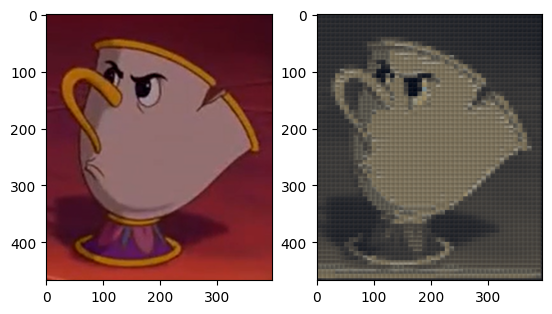

In [ ]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots(1, 2)
fig[0].imshow(image)
fig[1].imshow(reconstructed_image_32)

In [ ]:
# compute psnr
tf.image.psnr(image, reconstructed_image_32, max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=17.6788>

In [ ]:
tf.image.ssim(image, reconstructed_image_32, max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=0.4897367>

In [ ]:
tf.image.ssim_multiscale(image, reconstructed_image_32, max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6775523>

In [ ]:
encoder = tensorflow.keras.Model(image_input, encoded)

In [ ]:
image = tf.image.decode_image(tf.io.read_file('ciob.png'), channels=3, dtype='float32')
image = tf.image.rgb_to_yuv(image)

image_, _, _ = pad_image(image, PATCH_SIZE)

no_patches_width = image_.shape[1] // PATCH_SIZE
no_patches_height = image_.shape[0] // PATCH_SIZE

width = image_.shape[1]
height = image_.shape[0]

image_ = tf.expand_dims(image_, axis=0)
img_patches = tf.image.extract_patches(image_, sizes=[1, PATCH_SIZE, PATCH_SIZE, 1], strides=[1, PATCH_SIZE, PATCH_SIZE, 1], rates=[1, 1, 1, 1], padding='VALID')
img_patches = tf.reshape(img_patches, [-1, PATCH_SIZE, PATCH_SIZE, 3])

encoded_patches = encoder.predict(img_patches)

93/93 [==============================] - 0s 2ms/step


In [ ]:
encoded_patches = encoded_patches.astype(np.float16)
copy_encoded_patches = encoded_patches.copy()

In [ ]:
# keep only the first 4 decimals
encoded_patches = np.around(encoded_patches, 4)

In [ ]:
decoder_input = tensorflow.keras.layers.Input(shape=(1, 1, 8))
decoder = tensorflow.keras.Model(encoded, decoded)

rec = decoder.predict(encoded_patches)

 1/93 [..............................] - ETA: 11s

93/93 [==============================] - 0s 2ms/step


In [ ]:
reconstructed_image_16 = np.zeros((height, width, 3))

for i in range(no_patches_height):
    for j in range(no_patches_width):
        patch = rec[i*no_patches_width+j].reshape(PATCH_SIZE, PATCH_SIZE, 3)
        reconstructed_image_16[i*PATCH_SIZE:(i+1)*PATCH_SIZE, j*PATCH_SIZE:(j+1)*PATCH_SIZE] = patch

reconstructed_image_16 = reconstructed_image_16[:image.shape[0], :image.shape[1]]
reconstructed_image_16 = tf.convert_to_tensor(reconstructed_image_16)
reconstructed_image_16 = tf.image.yuv_to_rgb(reconstructed_image_16) * 255
reconstructed_image_16 = tf.cast(reconstructed_image_16, tf.uint8)

image = tf.image.yuv_to_rgb(image)
image = tf.cast(image * 255, tf.uint8)

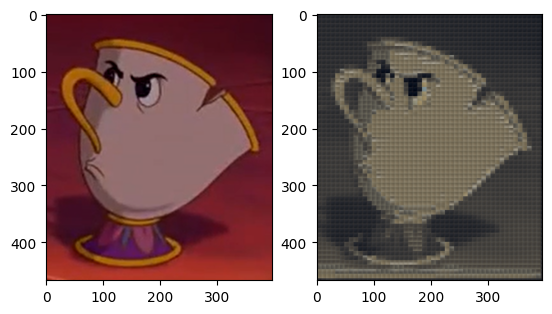

In [ ]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots(1, 2)
fig[0].imshow(image)
fig[1].imshow(reconstructed_image_16)

In [ ]:
tf.image.psnr(image, reconstructed_image_16, max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=17.67873>

In [ ]:
tf.image.ssim(image, reconstructed_image_16, max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=0.48972479>

In [ ]:
tf.image.ssim_multiscale(image, reconstructed_image_16, max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6775594>

In [ ]:
encoded_patches.shape

(2950, 1, 1, 1)